In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
feature_names = ["price", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status", "vin", "state", "transmission", "drive", "size", "paint_color", "lat", "long"]

car_df = pd.read_csv("Final Project/vehicles_clean_Marcell.csv",)

car_df.head()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,vin,state,transmission,drive,size,paint_color,lat,long
0,17899,2012,volkswagen,golf r,excellent,4 cylinders,gas,63500,clean,WVWPF7AJ6CW316713,ut,manual,4wd,compact,black,40.7372,-111.858
1,0,2016,ford,f-150,excellent,NaN,gas,10,clean,1FTMF1EP3GKF13544,ut,automatic,4wd,NaN,NaN,40.5881,-111.884
2,46463,2015,gmc,sierra 1500,excellent,NaN,gas,7554,clean,3GTU2WEC6FG228025,ut,automatic,4wd,NaN,white,40.5881,-111.884
3,0,2016,ford,f-150,excellent,NaN,gas,10,clean,1FTEX1EF6GKD25447,ut,automatic,4wd,NaN,NaN,40.5881,-111.884
4,49999,2018,ford,f-450,NaN,NaN,diesel,70150,clean,1FT8W4DT8GEA90427,ut,automatic,4wd,NaN,white,40.3744,-104.694


In [22]:
car_df.shape

(350312, 17)

In [23]:
car_df.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,vin,state,transmission,drive,size,paint_color,lat,long
count,350312,349264.0,335214,344868,189071,211443,347816,288534.0,348262,213338,350275,347793,251315,113434,239030,343430.0000,343430.0000
unique,17053,300.0,44,27830,7,9,6,105546.0,7,129132,39,4,4,5,13,38813.0000,37306.0000
top,0,2016.0,ford,f-150,excellent,6 cylinders,gas,0.0,clean,0,ca,automatic,4wd,full-size,white,43.1824,-84.1122
freq,27162,26222.0,63339,7737,96046,76168,304195,1346.0,335277,114,52743,314720,115697,61146,62386,2339.0000,2339.0000


In [58]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350312 entries, 0 to 350311
Data columns (total 17 columns):
price           350312 non-null float64
year            350312 non-null float64
manufacturer    350312 non-null object
model           350312 non-null object
condition       350312 non-null object
cylinders       350312 non-null float64
fuel            350312 non-null object
odometer        350312 non-null float64
title_status    350312 non-null object
vin             350312 non-null object
state           350312 non-null object
transmission    350312 non-null object
drive           350312 non-null float64
size            350312 non-null object
paint_color     350312 non-null object
lat             350312 non-null float64
long            350312 non-null float64
dtypes: float64(7), object(10)
memory usage: 48.1+ MB


In [57]:
car_df.year.astype('int')
car_df.price.astype('float')
car_df.odometer.astype('float')
car_df.lat.astype('int')
car_df.long.astype('int')

0        -111
1        -111
2        -111
3        -111
4        -104
5        -104
6        -104
7        -104
8        -104
9        -104
10       -104
11       -104
12       -104
13       -104
14       -104
15       -104
16       -104
17       -104
18       -104
19       -104
20       -104
21       -155
22       -111
23       -111
24       -111
25       -111
26       -111
27       -111
28       -111
29       -112
         ... 
350282    -74
350283    -74
350284    -74
350285    -74
350286    -75
350287    -74
350288    -74
350289    -74
350290    -75
350291    -74
350292    -75
350293    -74
350294    -75
350295    -74
350296    -74
350297    -74
350298    -74
350299    -74
350300    -74
350301    -74
350302    -74
350303    -74
350304    -74
350305    -75
350306    -74
350307    -74
350308    -74
350309    -74
350310    -74
350311    -74
Name: long, Length: 350312, dtype: int32

In [60]:
car_df.describe()

,price,year,cylinders,odometer,drive,lat,long
count,3.503120e+05,350312.000000,350312.0,3.503120e+05,350312.0,350312.000000,350312.000000
mean,5.907810e+04,2003.479872,0.0,8.322940e+04,0.0,37.708767,-94.346291
std,1.039924e+07,112.002379,0.0,1.057704e+05,0.0,8.153900,22.435581
min,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,-81.240000,-165.935000
25%,4.000000e+03,2007.000000,0.0,2.148900e+04,0.0,34.117500,-115.122000
50%,9.500000e+03,2012.000000,0.0,7.574250e+04,0.0,38.618400,-89.690300
75%,1.799500e+04,2015.000000,0.0,1.276215e+05,0.0,42.477800,-81.877600
max,3.600029e+09,2021.000000,0.0,1.000000e+07,0.0,81.569300,94.124800


ValueError: num must be 1 <= num <= 0, not 1

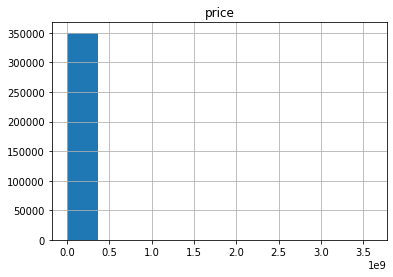

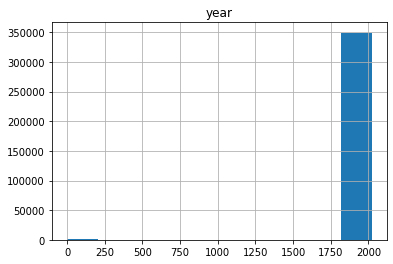

<Figure size 432x288 with 0 Axes>

In [59]:
 # quickly find distribution of features:
for f in car_df.columns:
    car_df.hist(f)

In [46]:
# Define our Numeric and Categorical Features
LABEL = 'price'

numeric_feature_names = ['year', 'odometer', 'lat','long', 'drive', 'cylinders']


categorical_feature_names = list(set(feature_names) - set(numeric_feature_names) - set([LABEL]))
# Assertions are simply boolean expressions that checks if the conditions return true or not. If it is true, 
# the program does nothing and move to the next line of code. However, if it's false, the program stops
# and throws an error.
assert len(numeric_feature_names) == 6
assert len(categorical_feature_names) == 10

In [47]:
car_df[categorical_feature_names].head()

,manufacturer,title_status,model,size,condition,transmission,fuel,vin,paint_color,state
0,volkswagen,clean,golf r,compact,excellent,manual,gas,WVWPF7AJ6CW316713,black,ut
1,ford,clean,f-150,NaN,excellent,automatic,gas,1FTMF1EP3GKF13544,NaN,ut
2,gmc,clean,sierra 1500,NaN,excellent,automatic,gas,3GTU2WEC6FG228025,white,ut
3,ford,clean,f-150,NaN,excellent,automatic,gas,1FTEX1EF6GKD25447,NaN,ut
4,ford,clean,f-450,NaN,NaN,automatic,diesel,1FT8W4DT8GEA90427,white,ut


In [48]:
num = car_df[categorical_feature_names].columns
for f in num:
    print(f'{f}:', car_df[f].unique())

manufacturer: ['volkswagen' 'ford' 'gmc' 'ram' 'toyota' 'chevrolet' 'mercedes-benz'
 'jeep' nan 'honda' 'lexus' 'cadillac' 'dodge' 'hyundai' 'subaru' 'bmw'
 'chrysler' 'nissan' 'mitsubishi' 'buick' 'acura' 'kia' 'rover'
 'alfa-romeo' 'mazda' 'saturn' 'pontiac' 'volvo' 'jaguar' 'fiat' 'audi'
 'mini' 'infiniti' 'lincoln' 'mercury' 'tesla' 'harley-davidson' 'porche'
 'land rover' 'aston-martin' 'ferrari' 'datsun' 'hennessey' ' tire rack'
 'morgan']
title_status: ['clean' 'rebuilt' 'salvage' 'lien' nan 'missing' 'parts only' 'GT']
model: ['golf r' 'f-150' 'sierra 1500' ... 'e-350 econoline xl'
 'Detroit Cascadia125' 'denali 3500 dually pickup']
size: ['compact' nan 'mid-size' 'full-size' 'sub-compact' ' nova']
condition: ['excellent' nan 'good' 'like new' 'fair' 'new' 'salvage' ' firebird']
transmission: ['manual' 'automatic' 'other' nan ' corvette']
fuel: ['gas' 'diesel' 'other' nan 'electric' 'hybrid' ' RS']
vin: ['WVWPF7AJ6CW316713' '1FTMF1EP3GKF13544' '3GTU2WEC6FG228025' ...
 '1G1JC124

In [49]:
car_df['size'][car_df['size']== 'Nan'].count()

0

In [50]:
car_df.drop(car_df[car_df['size']=='nan'].index,axis=0,inplace=True)

In [51]:
car_df[numeric_feature_names].head()

,year,odometer,lat,long,drive,cylinders
0,2012,63500,40.7372,-111.858,4wd,4 cylinders
1,2016,10,40.5881,-111.884,4wd,NaN
2,2015,7554,40.5881,-111.884,4wd,NaN
3,2016,10,40.5881,-111.884,4wd,NaN
4,2018,70150,40.3744,-104.694,4wd,NaN


In [52]:
# how to quickly clean and change dtype for interger / float fields
# Coerce the numeric features to numbers. This is necessary because the model
# crashes because not all the values are numeric.
for feature_name in numeric_feature_names + [LABEL]:
  car_df[feature_name] = pd.to_numeric(car_df[feature_name], errors='coerce')
# Fill missing values with 0.
# Is this an OK thing to do? You may want to come back and revisit this decision later.
car_df.fillna(0, inplace=True)

In [53]:
# how to quickly select columns dtypes using pandas:
    # To select all numeric types, use np.number or 'number'
    # To select strings you must use the object dtype, but note that this will return all object dtype columns
    # See the numpy dtype hierarchy
    # To select datetimes, use np.datetime64, 'datetime' or 'datetime64'
    # To select timedeltas, use np.timedelta64, 'timedelta' or 'timedelta64'
    # To select Pandas categorical dtypes, use 'category'
    # To select Pandas datetimetz dtypes, use 'datetimetz' (new in 0.20.0) or 'datetime64[ns, tz]'
car_df.select_dtypes(include=[np.number]).columns

Index(['price', 'year', 'cylinders', 'odometer', 'drive', 'lat', 'long'], dtype='object')

In [54]:
car_df.select_dtypes(include='object').columns

Index(['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'vin',
       'state', 'transmission', 'size', 'paint_color'],
      dtype='object')

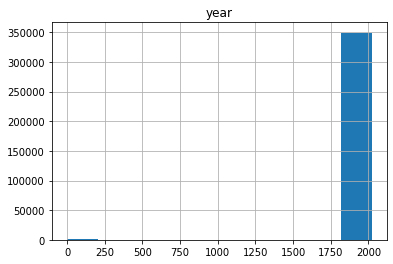

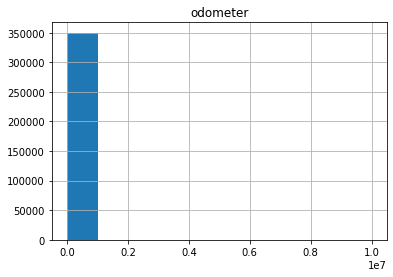

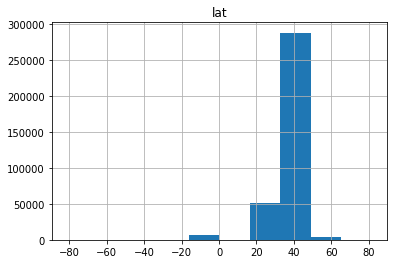

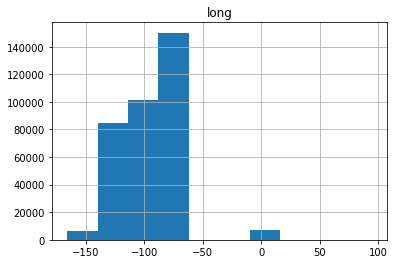

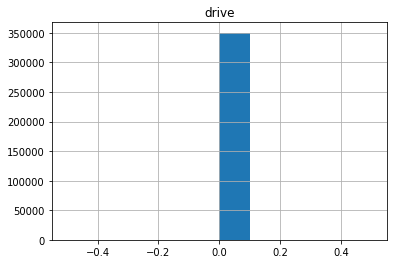

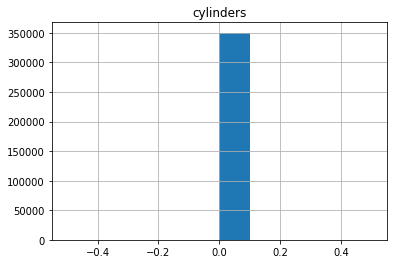

In [55]:
for f in numeric_feature_names:
    car_df.hist(f)